[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/Linear_least_sq.ipynb)

<font size=7>**最小二乗法による多項式近似**</font> 

**sinプロットを多項式近似する**

http://python-remrin.hatenadiary.jp/entry/2017/05/28/230742

変数リスト：

x_orig ：0から1まで100個の数値（等差数列）  
x_rand ：0から1まで100個のランダムサンプルデータ  
y_data ：xに対応するsinに乱数値を足したサンプルデータ  

In [126]:
!pip install scikit-learn

# （１）ライブラリのインポートとデータの生成

In [127]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.linear_model     import LinearRegression
from sklearn.preprocessing    import PolynomialFeatures
from sklearn.pipeline         import make_pipeline
from sklearn.pipeline         import Pipeline
from sklearn.metrics          import mean_squared_error ,r2_score

# 乱数のシードを設定
np.random.seed(9)

# 0から1まで100個の数値を生成。乱数を混ぜる前のx
x_orig = pd.Series(np.linspace(0,1,100))

# xに対応するsinを返す関数
def f(x):
  return np.sin(2*np.pi*x)

# 0から1まで100個のばらけたサンプルデータ（x）を生成
x = pd.Series(np.random.uniform(0,1,size=100))

# xに対応するsinに乱数値を足してサンプルデータ（y）を生成
y = f(x)+pd.Series(np.random.normal(scale=0.3,size=100))

df = pd.DataFrame({ 'x_orig' : x_orig,
                    'x_rand' : x,
                    'y_data' : y       })

df.head()

,x_orig,x_rand,y_data
0,0.000000,0.010374,-0.074609
1,0.010101,0.501875,-0.095010
2,0.020202,0.495773,0.037204
3,0.030303,0.133830,0.999694
4,0.040404,0.142111,0.827800


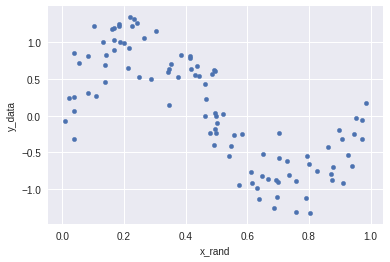

In [128]:
plt.figure()
df.plot(x='x_rand',y='y_data',kind='scatter');


# （２）学習用データとテスト用データを分ける

学習用データ：x_train ,y_train  
テストデータ：x_test  ,y_test

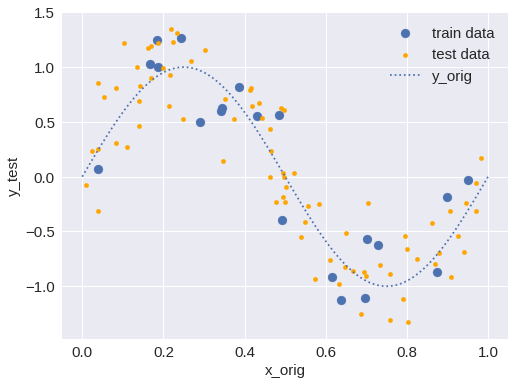

In [129]:
# 学習用データとテスト用データを分ける
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8)  # 学習データ20％、テストデータ80％

train_df = pd.DataFrame({'x_train' : x_train,
                         'y_train' : y_train})
test_df  = pd.DataFrame({'x_test'  : x_test,
                         'y_test'  : y_test})
orig_df  = pd.DataFrame({'x_orig'  : x_orig,
                         'y_orig'  : f(x_orig)})

plt.figure()
plt.rcParams['axes.labelsize']  = 15       # 軸ラベルのフォントサイズを設定 default : 12
plt.rcParams['legend.fontsize'] = 15       # 凡例のフォントサイズを設定
plt.rcParams['xtick.labelsize'] = 15       # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15       # 縦軸のフォントサイズ

ax1 = train_df.plot(x='x_train',y='y_train',kind='scatter',marker='o' ,s=80                 ,label='train data' ,figsize=(8,6))
ax2 = test_df.plot (x='x_test' ,y='y_test' ,kind='scatter',marker='.' ,s=80 ,color='orange' ,label='test data'  ,ax=ax1)
orig_df.plot       (x='x_orig' ,y='y_orig' ,ls=':'        ,ax=ax2); 

# （３）データの学習とモデルのグラフ表示

## （3.1）一次多項式関数（first-degree polynomial function）

**学習**

In [0]:
xtrain = train_df.loc[:, ['x_train']].as_matrix()
ytrain = train_df.loc[:, ['y_train']].as_matrix()

reg = LinearRegression()
reg.fit(xtrain, ytrain)

#visualising the result
xpred = xtrain
ypred = reg.predict(xtrain)

**予測**

In [0]:
#np.ndim(xpred)        ,xpred

In [0]:
#np.ndim(xpred.T)      ,xpred.T

In [0]:
#np.ndim(xpred.T[0,:]) ,xpred.T[0,:]

In [0]:
#pred_df  = pd.DataFrame({'x_pred'  : xpred.T[0,:],'y_pred'  : ypred.T[0,:]})
#pred_df.head()

In [0]:
#np.ndim(xpred.ravel()) ,xpred.ravel()

In [136]:
pred_df  = pd.DataFrame({'x_pred'  : xpred.ravel(),
                         'y_pred'  : ypred.ravel()})
pred_df.head()

,x_pred,y_pred
0,0.289299,0.546998
1,0.873401,-0.720878
2,0.187359,0.768275
3,0.491929,0.107162
4,0.638054,-0.210024


**可視化**

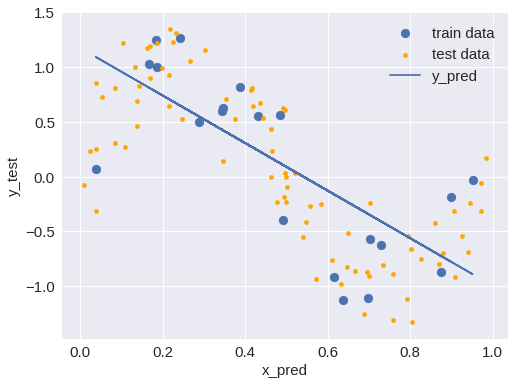

In [137]:
ax1 = train_df.plot(x='x_train',y='y_train',kind='scatter',marker='o' ,s=80                 ,label='train data' ,figsize=(8,6))
ax2 = test_df.plot (x='x_test' ,y='y_test' ,kind='scatter',marker='.' ,s=80 ,color='orange' ,label='test data'  ,ax=ax1)
pred_df.plot       (x='x_pred' ,y='y_pred' ,ls='-'        ,ax=ax2); 

**評価**

**平均二乗誤差 (MSE, Mean Squared Error)**   
　　sklearn.metrics.mean_squared_error  
　　実際の値と予測値の絶対値の 2 乗を平均したもの  
$$MSE(y,\widehat{y})=\frac{1}{n} \sum_{i=0}^{n-1} (y_i-\widehat{y_i})^2$$
　　($y$：実際の値 , $\widehat{y}$：予測値 , $n$：件数)  


**決定係数 ($R^2$ , R-squared, coefficient of determination)**  
　　sklearn.metrics.r2_score  
　　モデルの当てはまりの良さを示す指標。最も当てはまりの良い場合、1.0 となる。寄与率 (きよりつ) とも呼ばれる。  
$$R^2(y,\widehat{y})=1-\frac{ \sum_{i=0}^{n-1}(y_i-\widehat{y_i})^2}{ \sum_{i=0}^{n-1}(y_i-\overline{y_i})^2} $$
　　($y$：実際の値 , $\widehat{y}$：予測値 ,$\overline{y}$：実際の値の平均値 , $n$：件数)  

In [138]:
# テストデータを使って、予測値と実際の値の誤差を調べる

xtest = test_df.loc[:, ['x_test']].as_matrix()
ytest = test_df.loc[:, ['y_test']].as_matrix()

train_error = [mean_squared_error(ytrain,reg.predict(xtrain)),r2_score(ytrain,reg.predict(xtrain))]
test_error  = [mean_squared_error(ytest ,reg.predict(xtest)) ,r2_score(ytest ,reg.predict(xtest))]

train_error  ,test_error

([0.2908673404554133, 0.5242440780673736],
 [0.2585530912253888, 0.5279485733495082])

## （3.2）三次多項式関数（third-degree polynomial function）

In [0]:
deg = 3
  
poly = PolynomialFeatures(deg)
poly_xtrain = poly.fit_transform(xtrain)
poly_xtest  = poly.fit_transform(xtest)

reg = LinearRegression()
reg.fit(poly_xtrain, ytrain)

#visualising the result
xpred = xtest
ypred = reg.predict(poly_xtest)

In [140]:
pred_df = pd.DataFrame({'x_pred'  : xpred.ravel(),
                        'y_pred'  : ypred.ravel()})
pred_df = pred_df.sort_values(by='x_pred')
pred_df = pred_df.reset_index()
pred_df.head()

,index,x_pred,y_pred
0,6,0.010374,-0.173106
1,47,0.022867,-0.019438
2,48,0.037969,0.150574
3,39,0.038748,0.158887
4,57,0.039455,0.166386


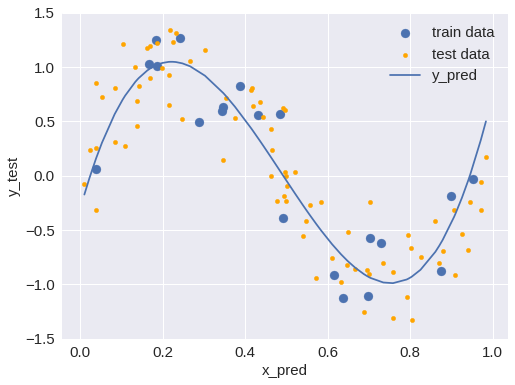

In [141]:
ylim=[-1.5,1.5]
ax1 = train_df.plot(x='x_train',y='y_train',kind='scatter',marker='o' ,s=80                 ,label='train data' ,figsize=(8,6))
ax2 = test_df.plot (x='x_test' ,y='y_test' ,kind='scatter',marker='.' ,s=80 ,color='orange' ,label='test data'  ,ax=ax1)
pred_df.plot       (x='x_pred' ,y='y_pred' ,ls='-'        ,ax=ax2     ,ylim=ylim); 

In [142]:
# テストデータを使って、予測値と実際の値の誤差を調べる

xtest = test_df.loc[:, ['x_test']].as_matrix()
ytest = test_df.loc[:, ['y_test']].as_matrix()

train_MSE  = mean_squared_error(ytrain,reg.predict(poly_xtrain))
train_R2   = r2_score(ytrain,reg.predict(poly_xtrain))
test_MRE   = mean_squared_error(ytest ,reg.predict(poly_xtest))
test_R2    = r2_score(ytest ,reg.predict(poly_xtest))

np.array([deg,train_MSE,train_R2,test_MRE,test_R2])

array([3.        , 0.0777883 , 0.87276589, 0.10085553, 0.81586376])

In [0]:
#names = ['Alice', 'Bob', 'Charlie']
#ages = [24, 50, 18]

#list(zip(names, ages))

## （3.3）一次～九次多項式を比較

In [0]:
#np.arange(10)

In [0]:
#np.arange(10).reshape(2,5)

In [0]:
#np.arange(10).reshape(2,5).ravel()

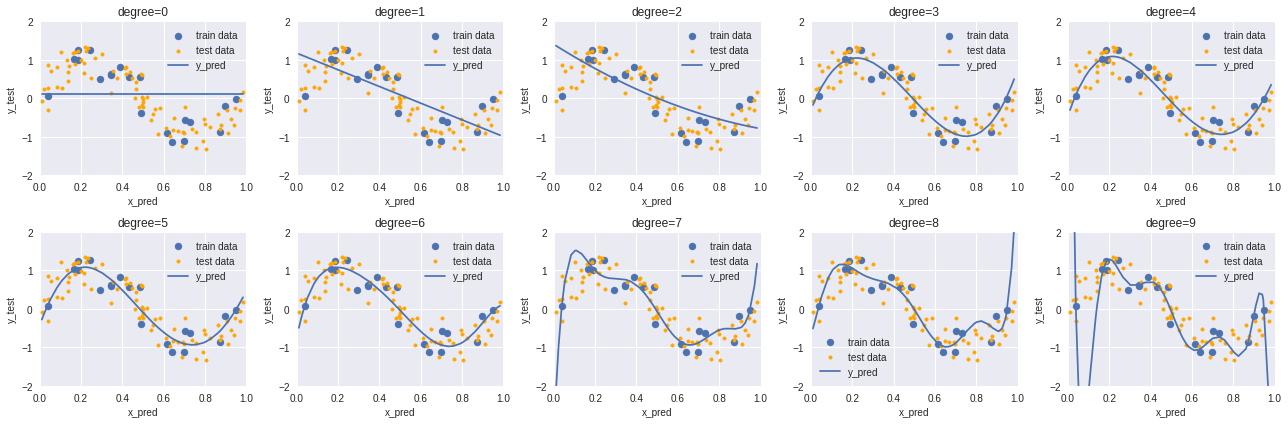

In [147]:
# 実データとの誤差を保存するarray
train_MSE  = np.empty(10)
train_R2   = np.empty(10)
test_MSE   = np.empty(10)
test_R2    = np.empty(10)

# 5×5のグラフを描く準備をする
plt.figure()
plt.rcParams['axes.labelsize']  = 10       # 軸ラベルのフォントサイズを設定 default : 12
plt.rcParams['legend.fontsize'] = 10       # 凡例のフォントサイズを設定
plt.rcParams['xtick.labelsize'] = 10       # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 10       # 縦軸のフォントサイズ
fig,axs = plt.subplots(2,5,figsize=(18,6))

# 次数0から9について調べる
for ax,deg in zip(axs.ravel(),np.arange(10)):   # deg：次数、ax：その次数のグラフを描画する場所
  
  # 多項式基底を作成する（PolynomialFeatures）
  poly = PolynomialFeatures(deg)
  poly_xtrain = poly.fit_transform(xtrain)
  poly_xtest  = poly.fit_transform(xtest)
  
  # モデルをつくる
  reg = LinearRegression()
  reg.fit(poly_xtrain, ytrain)
  
  # テストデータを与えて、作成したモデルによる予測値を計算
  xpred = xtest
  ypred = reg.predict(poly_xtest)
  
  # 予測値をデータフレーム化
  pred_df = pd.DataFrame({'x_pred'  : xpred.ravel(),
                          'y_pred'  : ypred.ravel()})
  pred_df = pred_df.sort_values(by='x_pred')
  pred_df = pred_df.reset_index()
  
  # 予測結果のグラフと学習データの点を描画
  xlim=[ 0 ,1]
  ylim=[-2, 2]
  ax1 = train_df.plot(x='x_train',y='y_train',kind='scatter',marker='o' ,s=50 ,ax=ax          ,label='train data' )
  ax2 = test_df.plot (x='x_test' ,y='y_test' ,kind='scatter',marker='.' ,s=50 ,color='orange' ,label='test data'  ,ax=ax1)
  pred_df.plot       (x='x_pred' ,y='y_pred' ,ls='-'        ,ax=ax2     ,ylim=ylim ,xlim=xlim ,title='degree={}'.format(deg)); 

  # テストデータを使って、予測値と実際の値の誤差を調べる
  xtest = test_df.loc[:, ['x_test']].as_matrix()
  ytest = test_df.loc[:, ['y_test']].as_matrix()
  
  train_MSE[deg]  = mean_squared_error(ytrain,reg.predict(poly_xtrain))
  train_R2[deg]   = r2_score(ytrain,reg.predict(poly_xtrain))
  test_MSE[deg]   = mean_squared_error(ytest ,reg.predict(poly_xtest))
  test_R2[deg]    = r2_score(ytest ,reg.predict(poly_xtest))
  
plt.tight_layout()

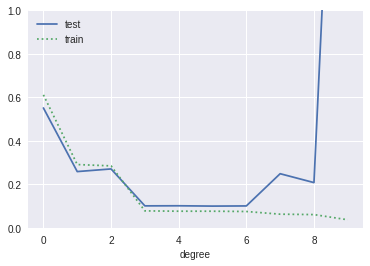

In [148]:
# 誤差のデータフレームを作成
deg = np.arange(10)
df_err = pd.DataFrame({'degree':deg, 'train_MSE':train_MSE, 'train_R2':train_R2, 'test_MSE':test_MSE, 'test_R2':test_R2})

# 平均二乗誤差MSE のグラフを描く
ax = df_err.plot(x='degree',y='test_MSE',ls='-' ,label='test')
df_err.plot(x='degree',y='train_MSE',ls=':' ,label='train',ax=ax, ylim=[0,1])

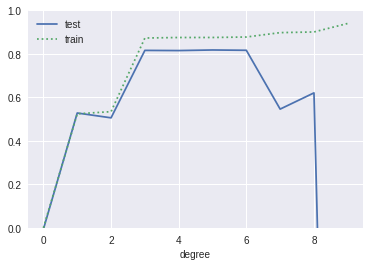

In [149]:
# 決定係数R2 のグラフを描く
ax = df_err.plot(x='degree',y='test_R2',ls='-' ,label='test')
df_err.plot(x='degree',y='train_R2',ls=':' ,label='train',ax=ax, ylim=[0,1])

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html  
http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py